In [1]:
# Housing Dataset used

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import scipy
import pylab

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [3]:
# Import data

file = open('E:/大学相关/硕士相关/IE517/Module 4/housing.csv')
House = pd.read_csv(file)
House

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
# Summary of Data
# Data Information

House.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Summary of Data
# Data Description

House.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Preprocessing
# Finding NA in Dataset

print(House[House.isna().any(axis = 1)])

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


In [7]:
# There is no empty value in dataset

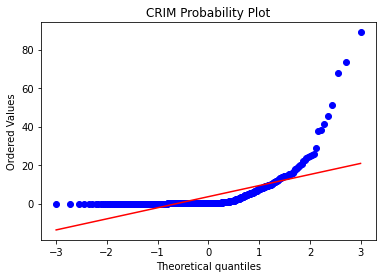

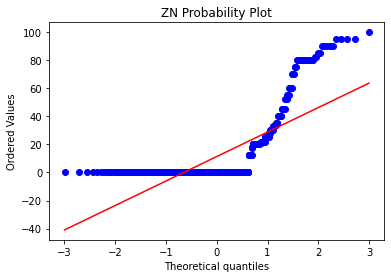

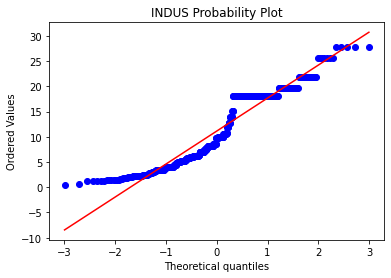

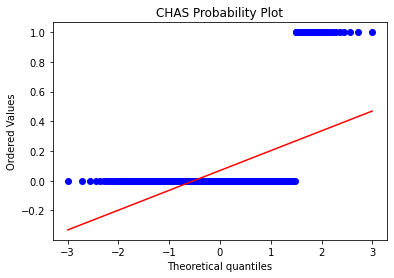

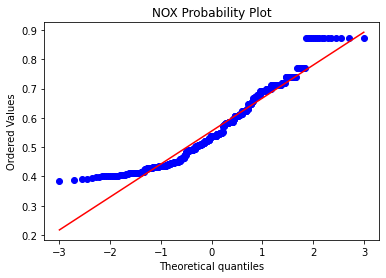

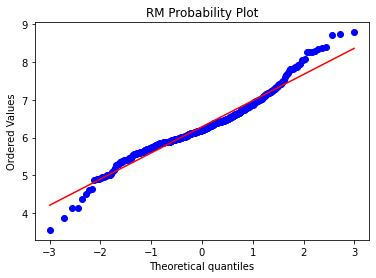

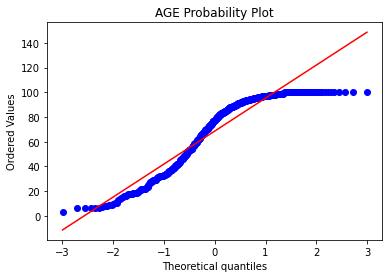

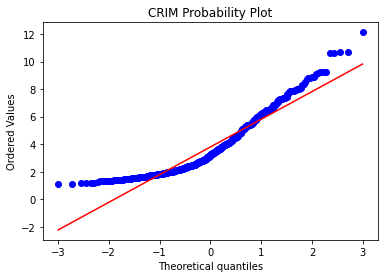

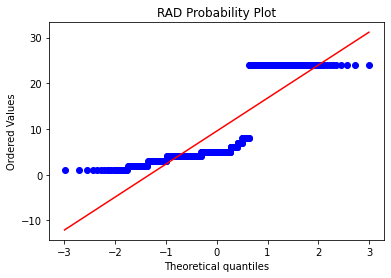

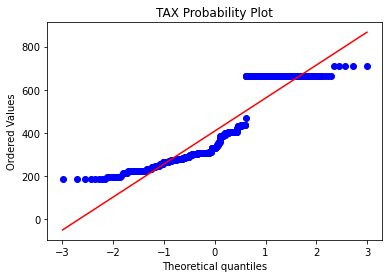

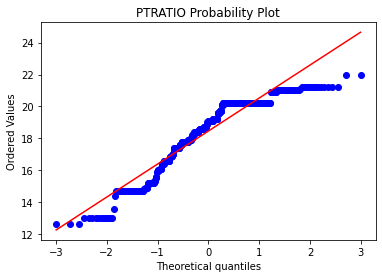

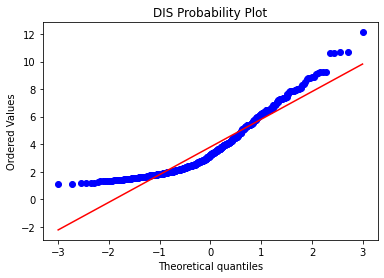

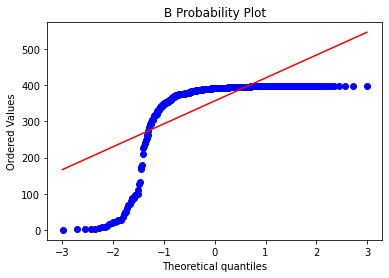

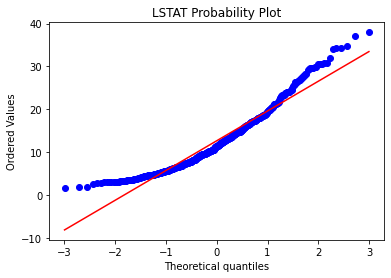

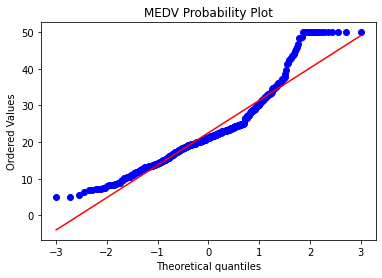

In [8]:
# EDA Part
# Part1 Q-Q Plot

scipy.stats.probplot(House['CRIM'], dist = 'norm', plot = pylab)
pylab.title('CRIM Probability Plot')
pylab.show()

scipy.stats.probplot(House['ZN'], dist = 'norm', plot = pylab)
pylab.title('ZN Probability Plot')
pylab.show()

scipy.stats.probplot(House['INDUS'], dist = 'norm', plot = pylab)
pylab.title('INDUS Probability Plot')
pylab.show()

scipy.stats.probplot(House['CHAS'], dist = 'norm', plot = pylab)
pylab.title('CHAS Probability Plot')
pylab.show()

scipy.stats.probplot(House['NOX'], dist = 'norm', plot = pylab)
pylab.title('NOX Probability Plot')
pylab.show()

scipy.stats.probplot(House['RM'], dist = 'norm', plot = pylab)
pylab.title('RM Probability Plot')
pylab.show()

scipy.stats.probplot(House['AGE'], dist = 'norm', plot = pylab)
pylab.title('AGE Probability Plot')
pylab.show()

scipy.stats.probplot(House['DIS'], dist = 'norm', plot = pylab)
pylab.title('CRIM Probability Plot')
pylab.show()

scipy.stats.probplot(House['RAD'], dist = 'norm', plot = pylab)
pylab.title('RAD Probability Plot')
pylab.show()

scipy.stats.probplot(House['TAX'], dist = 'norm', plot = pylab)
pylab.title('TAX Probability Plot')
pylab.show()

scipy.stats.probplot(House['PTRATIO'], dist = 'norm', plot = pylab)
pylab.title('PTRATIO Probability Plot')
pylab.show()

scipy.stats.probplot(House['DIS'], dist = 'norm', plot = pylab)
pylab.title('DIS Probability Plot')
pylab.show()

scipy.stats.probplot(House['B'], dist = 'norm', plot = pylab)
pylab.title('B Probability Plot')
pylab.show()

scipy.stats.probplot(House['LSTAT'], dist = 'norm', plot = pylab)
pylab.title('LSTAT Probability Plot')
pylab.show()

scipy.stats.probplot(House['MEDV'], dist = 'norm', plot = pylab)
pylab.title('MEDV Probability Plot')
pylab.show()

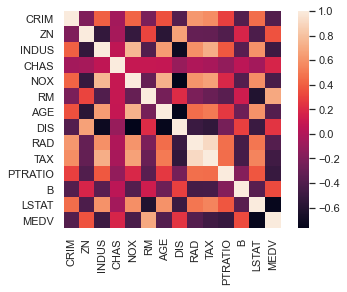

In [9]:
# EDA Part
# Part2 Heatmap

cols_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
             'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

corr_House = np.corrcoef(House[cols_name].values.T)
sns.set(font_scale = 1)
heatmap_House = sns.heatmap(corr_House, cbar = True, annot = False, square = True, 
                fmt = '.3f', annot_kws = {'size': 20}, yticklabels = cols_name, 
                xticklabels = cols_name)
plt.show()

<Figure size 1080x1080 with 0 Axes>

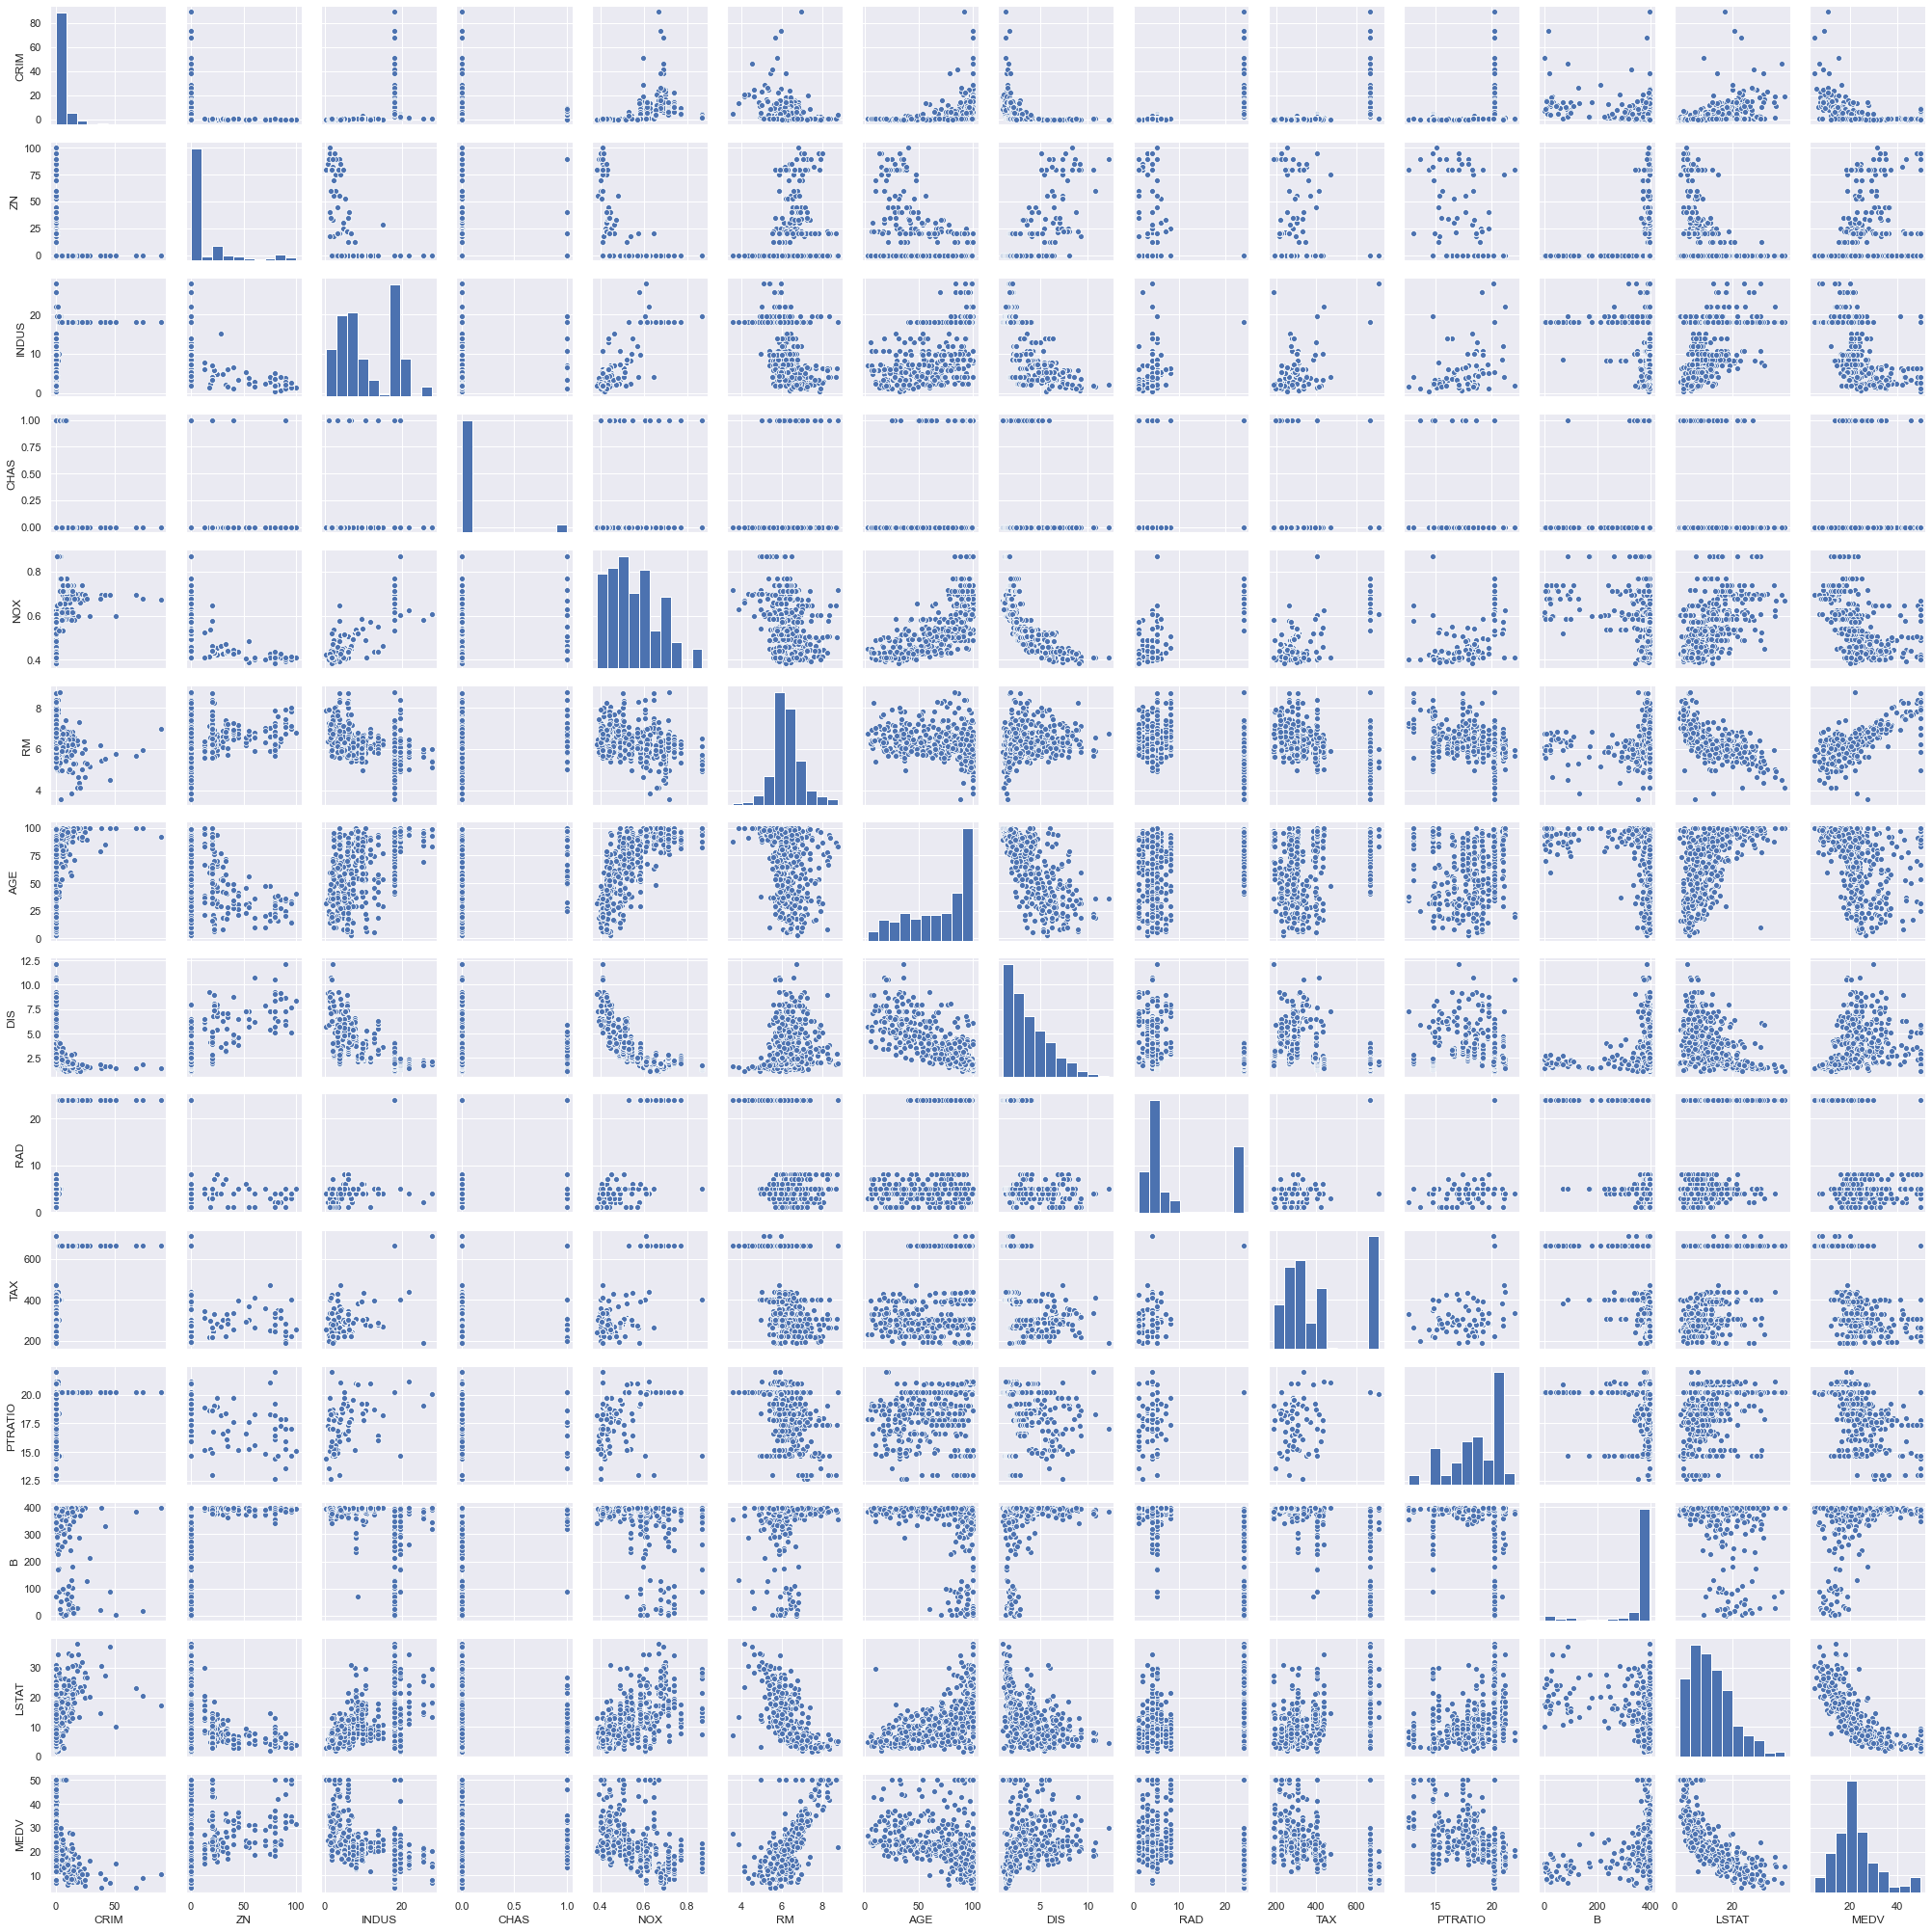

In [10]:
# EDA Part
# Part3 Scatterplot & Histogram

plt.figure(figsize = (15, 15))
sns.pairplot(House[cols_name], height = 2)
plt.tight_layout()
plt.show()

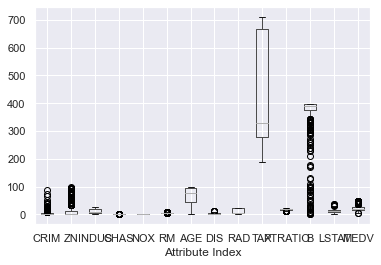

In [11]:
# EDA Part
# Part4 Boxplot

f = House.boxplot()
plt.xlabel("Attribute Index")
plt.show()

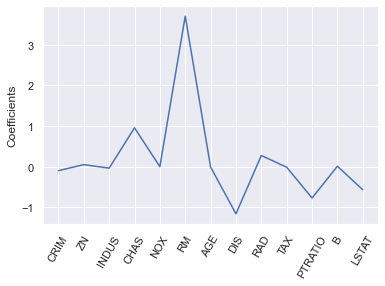

In [12]:
# EDA Part
# Feature Selection

x_cols_name = House.drop('MEDV', axis = 1).columns

X = House.iloc[:, :-1].values
y = House['MEDV'].values

lasso_select = Lasso(alpha = 0.1)
lasso_s_coef = lasso_select.fit(X, y).coef_

plt.plot(range(len(x_cols_name)), lasso_s_coef)
plt.xticks(range(len(x_cols_name)), x_cols_name, rotation = 60)
plt.ylabel('Coefficients')
plt.show()

In [13]:
# Choose CHAS, RM, DIS, RAD, PTRATIO, LSTAT

N = 13

In [14]:
# Train-Test Split

#cols_s_name = ['CHAS', 'RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT']
cols_s_name = x_cols_name # We don't select variable this time
X_s = House.loc[:, cols_s_name].values
y_s = House['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, 
                                                    test_size = 0.2, random_state = 42)

In [15]:
# Linear Regression Part
# Regression

lr = LinearRegression()
lr.fit(X_train,y_train)
for i in range(N):
    print('Slope of %s is %.3f' % (cols_s_name[i], lr.coef_[i]))
print('Intercept is %.3f' % lr.intercept_)

print("*******************************************************************************")
print("MEDV =", end ='')
for i in range(N):
    print(" (%.3f*%s) +" % (lr.coef_[i], cols_s_name[i]), end ='')
print(" %.3f" % lr.intercept_)
print("*******************************************************************************")

Slope of CRIM is -0.113
Slope of ZN is 0.030
Slope of INDUS is 0.040
Slope of CHAS is 2.784
Slope of NOX is -17.203
Slope of RM is 4.439
Slope of AGE is -0.006
Slope of DIS is -1.448
Slope of RAD is 0.262
Slope of TAX is -0.011
Slope of PTRATIO is -0.915
Slope of B is 0.012
Slope of LSTAT is -0.509
Intercept is 30.247
*******************************************************************************
MEDV = (-0.113*CRIM) + (0.030*ZN) + (0.040*INDUS) + (2.784*CHAS) + (-17.203*NOX) + (4.439*RM) + (-0.006*AGE) + (-1.448*DIS) + (0.262*RAD) + (-0.011*TAX) + (-0.915*PTRATIO) + (0.012*B) + (-0.509*LSTAT) + 30.247
*******************************************************************************


(-10.0, 50.0)

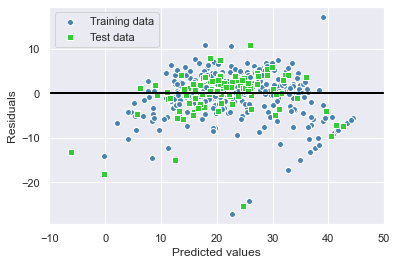

In [16]:
# Linear Regression Part
# Residual Errors

y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)
plt.scatter(y_train_pred_lr,  y_train_pred_lr - y_train, 
            c = 'steelblue', marker = 'o', edgecolor = 'white',label = 'Training data')
plt.scatter(y_test_pred_lr,  y_test_pred_lr - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])

In [17]:
# Linear Regression Part
# MSE

print('Linear Regression MSE train: %.3f, test: %.3f' 
      % (mean_squared_error(y_train, y_train_pred_lr),
         mean_squared_error(y_test, y_test_pred_lr)))

Linear Regression MSE train: 21.641, test: 24.291


In [18]:
# Linear Regression Part
# R^2

print('Linear Regression R^2 train: %.3f, test: %.3f' 
      % (r2_score(y_train, y_train_pred_lr),
         r2_score(y_test, y_test_pred_lr)))

Linear Regression R^2 train: 0.751, test: 0.669


In [19]:
# Linear Regression Part
# Cross-validation

cv_r_lr = cross_val_score(lr, X, y, cv = 5)

print('Results of 5-fold cross-validation for Linear Regression: ', end = '')
print(cv_r_lr)
print('Result of 5-fold cross-validation mean for Linear Regression: ', end = '')
print(np.mean(cv_r_lr))

Results of 5-fold cross-validation for Linear Regression: [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Result of 5-fold cross-validation mean for Linear Regression: 0.35327592439588185


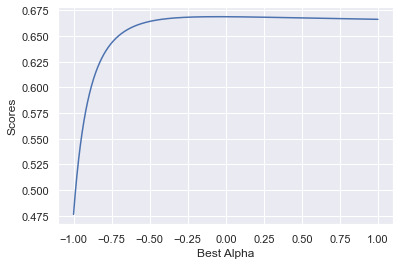

Best Alpha: -0.052000000000000046
0.668780817139786


In [20]:
# Ridge Regression Part
# Find Best Alpha

# We can not find a best alpha using selected
# Thus we use data before selected
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)

begin = -1
end = 1
irange_r=np.arange(begin, end, 0.001)
scores_r=[]

for i in irange_r:
    ridge = Ridge(alpha = i)
    ridge.fit(X_train_all, y_train_all)
    scores_r.append(ridge.score(X_test_all, y_test_all))
    
maxridge = max(scores_r)
max_index =  scores_r.index(maxridge)
best_alpha = max_index / 1000 + begin
plt.plot(irange_r, scores_r)
plt.xlabel('Best Alpha')
plt.ylabel('Scores')
plt.show()

print("Best Alpha: ", end='')
print(best_alpha)
print(maxridge)

In [21]:
# Ridge Regression Part
# Regression

ridge = Ridge(alpha = -0.052)
ridge.fit(X_train, y_train)
for i in range(N):
    print('Slope of %s is %.3f' % (cols_s_name[i], ridge.coef_[i]))
print('Intercept is %.3f' % ridge.intercept_)

print("*******************************************************************************")
print("MEDV =", end ='')
for i in range(N):
    print(" (%.3f*%s) +" % (ridge.coef_[i], cols_s_name[i]), end ='')
print(" %.3f" % ridge.intercept_)
print("*******************************************************************************")

Slope of CRIM is -0.113
Slope of ZN is 0.030
Slope of INDUS is 0.044
Slope of CHAS is 2.804
Slope of NOX is -17.952
Slope of RM is 4.434
Slope of AGE is -0.006
Slope of DIS is -1.459
Slope of RAD is 0.264
Slope of TAX is -0.011
Slope of PTRATIO is -0.924
Slope of B is 0.012
Slope of LSTAT is -0.507
Intercept is 30.765
*******************************************************************************
MEDV = (-0.113*CRIM) + (0.030*ZN) + (0.044*INDUS) + (2.804*CHAS) + (-17.952*NOX) + (4.434*RM) + (-0.006*AGE) + (-1.459*DIS) + (0.264*RAD) + (-0.011*TAX) + (-0.924*PTRATIO) + (0.012*B) + (-0.507*LSTAT) + 30.765
*******************************************************************************


(-10.0, 50.0)

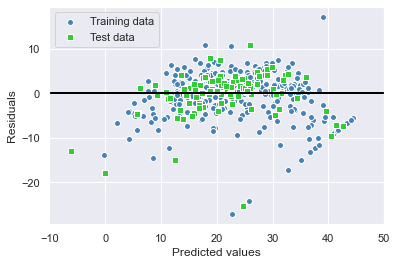

In [22]:
# Ridge Regression Part
# Residual Errors

y_train_pred_r = ridge.predict(X_train)
y_test_pred_r = ridge.predict(X_test)
plt.scatter(y_train_pred_r,  y_train_pred_r - y_train, 
            c = 'steelblue', marker = 'o', edgecolor = 'white',label = 'Training data')
plt.scatter(y_test_pred_r,  y_test_pred_r - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])

In [23]:
# Ridge Regression Part
# MSE

print('Ridge Regression MSE train: %.3f, test: %.3f' 
      % (mean_squared_error(y_train, y_train_pred_r),
         mean_squared_error(y_test, y_test_pred_r)))

Ridge Regression MSE train: 21.643, test: 24.290


In [24]:
# Ridge Regression Part
# R^2

print('Ridge Regression R^2 train: %.3f, test: %.3f' 
      % (r2_score(y_train, y_train_pred_r),
         r2_score(y_test, y_test_pred_r)))

Ridge Regression R^2 train: 0.751, test: 0.669


In [25]:
# Ridge Regression Part
# Cross-validation

cv_r_r = cross_val_score(ridge, X, y, cv = 5)

print('Results of 5-fold cross-validation for Ridge Regression: ', end = '')
print(cv_r_r)
print('Result of 5-fold cross-validation mean for Ridge Regression: ', end = '')
print(np.mean(cv_r_r))

Results of 5-fold cross-validation for Ridge Regression: [ 0.6367417   0.70695634  0.58217274  0.07884287 -0.26306847]
Result of 5-fold cross-validation mean for Ridge Regression: 0.3483290338846887


D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9658.650505102742, tolerance: 3.509685514851485
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9882.296533660558, tolerance: 3.509685514851485
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10105.942562218452, tolerance: 3.509685514851485
  positive)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10314.017867556326, tolerance: 3.5096855148

D:\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16569.64158085856, tolerance: 3.509685514851485
  positive)


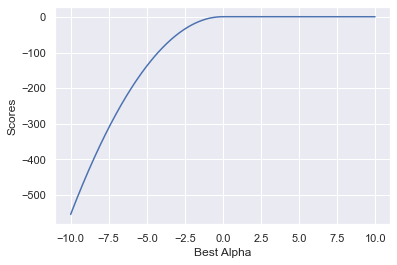

Best Alpha: 0.7200000000000006
0.6706495826111205


In [26]:
# Lasso Regression Part
# Find best alpha

begin = -10
end = 10
irange_l=np.arange(begin, end, 0.01)
scores_l=[]

for i in irange_l:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train, y_train)
    scores_l.append(lasso.score(X_test, y_test))
    
maxridge = max(scores_l)
max_index =  scores_l.index(maxridge)
best_alpha = max_index / 100 + begin
plt.plot(irange_l, scores_l)
plt.xlabel('Best Alpha')
plt.ylabel('Scores')
plt.show()

print("Best Alpha: ", end='')
print(best_alpha)
print(maxridge)

In [27]:
# Lasso Regression Part
# Regression

lasso = Lasso(alpha = 0.720)
lasso.fit(X_train, y_train)
for i in range(N):
    print('Slope of %s is %.3f' % (cols_s_name[i], lasso.coef_[i]))
print('Intercept is %.3f' % lasso.intercept_)

print("*******************************************************************************")
print("MEDV =", end ='')
for i in range(N):
    print(" (%.3f*%s) +" % (lasso.coef_[i], cols_s_name[i]), end ='')
print(" %.3f" % lasso.intercept_)
print("*******************************************************************************")

Slope of CRIM is -0.086
Slope of ZN is 0.031
Slope of INDUS is -0.000
Slope of CHAS is 0.000
Slope of NOX is -0.000
Slope of RM is 2.474
Slope of AGE is 0.007
Slope of DIS is -0.795
Slope of RAD is 0.229
Slope of TAX is -0.013
Slope of PTRATIO is -0.720
Slope of B is 0.012
Slope of LSTAT is -0.692
Intercept is 30.280
*******************************************************************************
MEDV = (-0.086*CRIM) + (0.031*ZN) + (-0.000*INDUS) + (0.000*CHAS) + (-0.000*NOX) + (2.474*RM) + (0.007*AGE) + (-0.795*DIS) + (0.229*RAD) + (-0.013*TAX) + (-0.720*PTRATIO) + (0.012*B) + (-0.692*LSTAT) + 30.280
*******************************************************************************


(-10.0, 50.0)

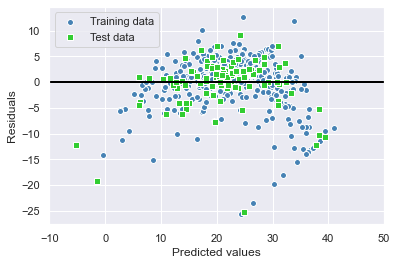

In [28]:
# Lasso Regression Part
# Residual Errors

y_train_pred_l = lasso.predict(X_train)
y_test_pred_l = lasso.predict(X_test)
plt.scatter(y_train_pred_l,  y_train_pred_l - y_train, 
            c = 'steelblue', marker = 'o', edgecolor = 'white',label = 'Training data')
plt.scatter(y_test_pred_l,  y_test_pred_l - y_test,
            c = 'limegreen', marker = 's', edgecolor = 'white',label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black', lw = 2)
plt.xlim([-10, 50])

In [29]:
# Lasso Regression Part
# MSE

print('Lasso Regression MSE train: %.3f, test: %.3f' 
      % (mean_squared_error(y_train, y_train_pred_l),
         mean_squared_error(y_test, y_test_pred_l)))

Lasso Regression MSE train: 24.738, test: 24.153


In [30]:
# Lasso Regression Part
# R^2

print('Lasso Regression R^2 train: %.3f, test: %.3f' 
      % (r2_score(y_train, y_train_pred_l),
         r2_score(y_test, y_test_pred_l)))

Lasso Regression R^2 train: 0.715, test: 0.671


In [31]:
# Lasso Regression Part
# Cross-validation

cv_r_l = cross_val_score(lasso, X, y, cv = 5)

print('Results of 5-fold cross-validation for Lasso Regression: ', end = '')
print(cv_r_l)
print('Result of 5-fold cross-validation mean for Lasso Regression: ', end = '')
print(np.mean(cv_r_l))

Results of 5-fold cross-validation for Lasso Regression: [0.61013218 0.67048226 0.38406917 0.29376417 0.20419268]
Result of 5-fold cross-validation mean for Lasso Regression: 0.4325280934231541


In [32]:
print("My name is Jingfan Xing")
print("My NetID is: jingfan5")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Jingfan Xing
My NetID is: jingfan5
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
